<a href="https://colab.research.google.com/github/ShyamSundhar1411/My-ML-Notebooks/blob/master/Milestone%20Projects/Milestone_Project_3_Bitpredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Dataset

In [3]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-03-30 16:53:41--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.008s  

2023-03-30 16:53:41 (20.5 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [4]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [5]:
dataset = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",parse_dates = 
                      [ 'Date'],index_col = ['Date'])

In [6]:
dataset

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.654990,124.304660,124.751660,122.563490
2013-10-02,BTC,125.455000,123.654990,125.758500,123.633830
2013-10-03,BTC,108.584830,125.455000,125.665660,83.328330
2013-10-04,BTC,118.674660,108.584830,118.675000,107.058160
2013-10-05,BTC,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [8]:
dataset.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [9]:
len(dataset)

2787

In [10]:
bitcoin_prices = pd.DataFrame(dataset['Closing Price (USD)']).rename(columns = {"Closing Price (USD)":"Price"})

In [11]:
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


Text(0.5, 1.0, '1 Oct 2018 to 18 May 2021')

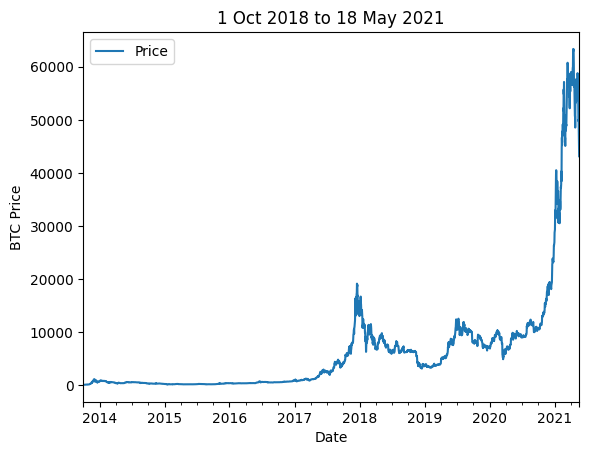

In [12]:
import matplotlib.pyplot as plt
bitcoin_prices.plot()
plt.ylabel("BTC Price")
plt.title("1 Oct 2018 to 18 May 2021")

<Axes: xlabel='Date'>

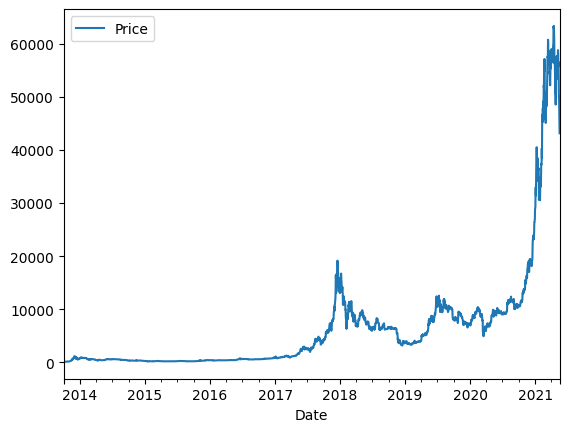

In [13]:
bitcoin_prices.plot()

### Importing with CSV Module

In [14]:
import csv
from datetime import datetime
timesteps = []
btc_price = []
with open ("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",'r') as f:
  reader = csv.reader(f,delimiter = ",")
  next(reader)
  for line in reader:
    timesteps.append(datetime.strptime(line[1],"%Y-%m-%d"))
    btc_price.append(float(line[2]))

In [15]:
btc_price[:10]

[123.65499,
 125.455,
 108.58483,
 118.67466,
 121.33866,
 120.65533,
 121.795,
 123.033,
 124.049,
 125.96116]

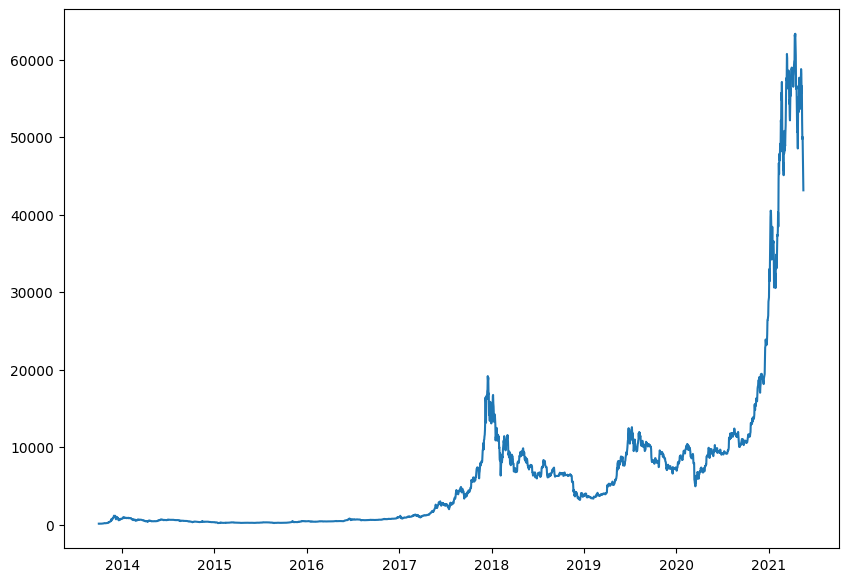

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
plt.plot(timesteps,btc_price)

### Creating train and test sets with time series data (Wrong Way)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

In [19]:
timesteps,prices

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', ...,
        '2021-05-16T00:00:00.000000000', '2021-05-17T00:00:00.000000000',
        '2021-05-18T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([  123.65499   ,   125.455     ,   108.58483   , ...,
        47885.62525472, 45604.61575361, 43144.47129086]))

In [20]:
x_train,x_test,y_train,y_test = train_test_split(timesteps,prices,test_size = 0.2)

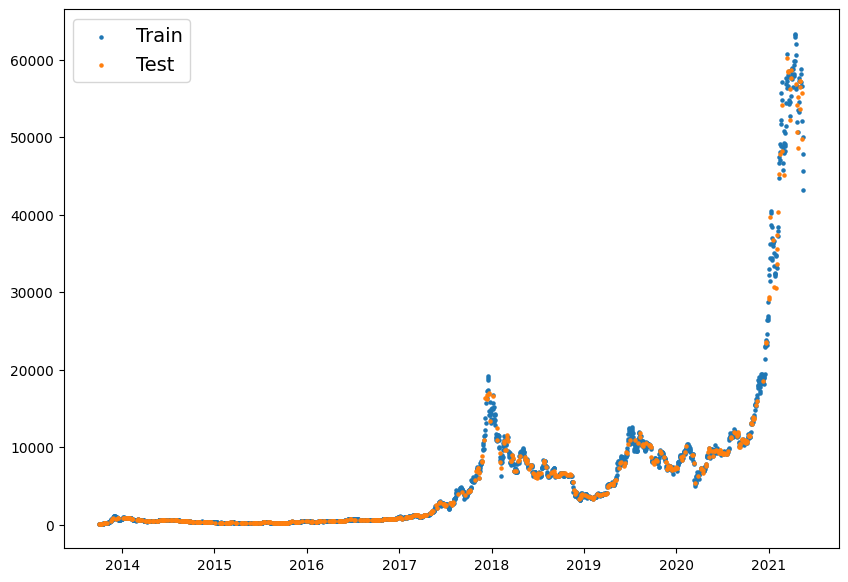

In [21]:
plt.figure(figsize = (10,7))
plt.scatter(x_train,y_train,s = 5,label = "Train")
plt.scatter(x_test,y_test,s = 5,label = "Test")
plt.legend(fontsize = 14)

### Creating splits for time series (right way)

In [22]:
split_size = int(0.8*len(prices))
x_train,y_train = timesteps[:split_size],prices[:split_size]
x_test,y_test  = timesteps[split_size:],prices[split_size:]

In [23]:
len(x_train),len(x_test)

(2229, 558)

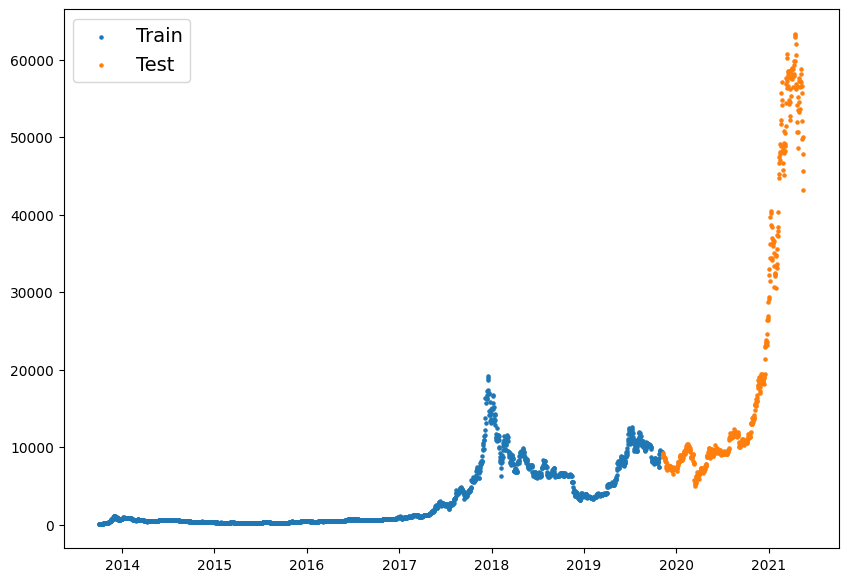

In [24]:
plt.figure(figsize = (10,7))
plt.scatter(x_train,y_train,s = 5,label = "Train")
plt.scatter(x_test,y_test,s = 5,label = "Test")
plt.legend(fontsize = 14)

### Creating plot functions

In [25]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

## Model 0 - Naive Baselline

In [26]:
naive_forecast = y_test[:-1]

In [27]:
naive_forecast[-10:]

array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
       56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361])

In [28]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

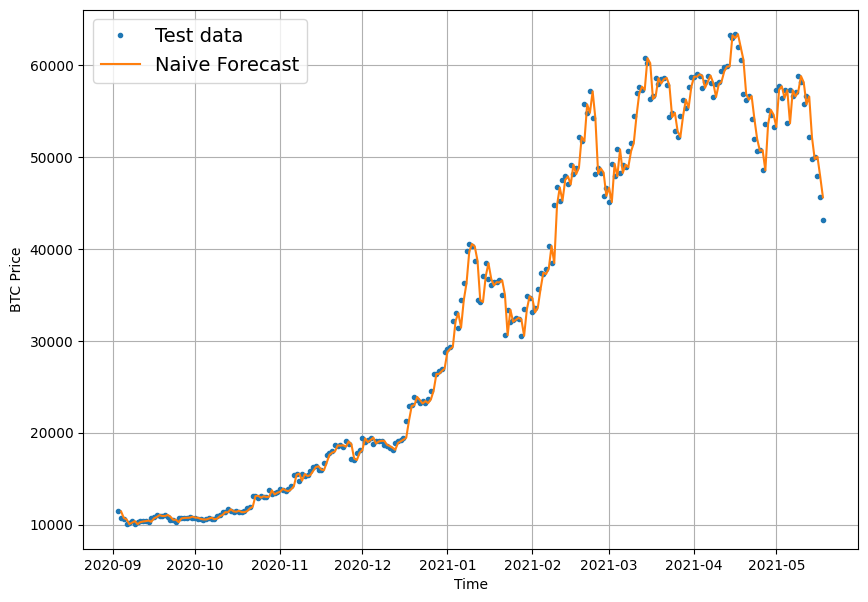

In [29]:
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps 
plot_time_series(timesteps=x_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=x_test[1:], values=naive_forecast, format="-", start=offset, label="Naive Forecast")

In [30]:
import tensorflow as tf

In [31]:
# MASE Implementation
def mean_absolute_scaled_error(y_true,y_pred):
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))

  return mae/mae_naive_no_season

In [32]:
mean_absolute_scaled_error(y_true = y_test[1:],y_pred = naive_forecast).numpy()

0.9995699939182624

In [33]:
def evaluation_metrics(y_pred,y_true):
  y_true = tf.cast(y_true,dtype = tf.float32)
  y_pred = tf.cast(y_pred,dtype = tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true,y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true,y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
  mase = mean_absolute_scaled_error(y_true,y_pred)
  if mae.ndim>0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)
  return {"mae":mae.numpy(),"mse":mse.numpy(),"rmse":rmse.numpy(),"mape":mape.numpy(),"mase":mase.numpy()}


In [34]:
naive_results = evaluation_metrics(y_test[1:],naive_forecast)

In [35]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.527042,
 'mase': 1.0060278}

In [36]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737222>

In [37]:
tf.reduce_min(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>

## Windowing dataset

In [38]:
HORIZON = 1 #Predict 1 Day
WINDOW = 7 #Use past week of Bitcoin data to one predictor


In [39]:
def get_labelled_window(x,horizon = HORIZON):
  '''
    Create Labels for windowed dataset.
    E.g. If Horizon = 1
    Input: [0,1,2,3,4,5,6,7] -> Output: ([0,1,2,3,4,5,6] -> [7]) Window Size = 7
  '''
  return x[:,:-horizon],x[:,-horizon:]

In [40]:
test_window,test_label = get_labelled_window(tf.expand_dims(tf.range(8)+1,axis = 0))

In [41]:
tf.expand_dims(tf.range(8)+1,axis = 0)

<tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7, 8]], dtype=int32)>

In [42]:
print("Window : {x} -> Label: {y}".format(x = tf.squeeze(test_window).numpy(),y = tf.squeeze(test_label).numpy()))

Window : [1 2 3 4 5 6 7] -> Label: 8


## Preprocessing Functions for Windowed Data

In [43]:
import numpy as np

In [44]:
def make_windows(x,window_size =  WINDOW,horizon = HORIZON):
  window_step = np.expand_dims(np.arange(window_size+horizon),axis = 0)
  window_indexes = window_step+np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis = 0).T
  windowed_array = x[window_indexes]
  
  windows,labels = get_labelled_window(windowed_array,horizon = HORIZON)
  return windows,labels

In [45]:
full_windows,full_labels = make_windows(prices,window_size = WINDOW,horizon = HORIZON)

In [46]:
for i in range(3):
  print(full_windows[i],"->",full_labels[i])

[123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> [123.033]
[125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> [124.049]
[108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> [125.96116]


## Turning windows into Training and Test Sets

In [47]:
def make_train_test_splits(windows,labels,test_split = 0.2):
  split_size = int(len(windows)*(1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows,test_windows,train_labels,test_labels

In [48]:
train_windows,test_windows,train_labels,test_labels = make_train_test_splits(full_windows,full_labels)

## Making modelling checkpoint

In [49]:
import os
def create_model_checkpoint(model_name,save_path = "model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path,model_name),verbose=0,save_best_only = True)

## Model 1 - Dense Model

In [50]:
import tensorflow as tf
from tensorflow.keras import layers
tf.random.set_seed(42)

In [51]:
model_1 = tf.keras.Sequential([
    layers.Dense(128,activation = "relu"),
    layers.Dense(HORIZON,activation = "linear")
],name = "model_1_dense")

model_1.compile(loss = "mae",metrics = ["mae"],optimizer = "adam")

In [52]:
history_1 = model_1.fit(
    train_windows,
    train_labels,
    epochs = 100,
    verbose = 1,
    batch_size = 128,
    validation_data = (test_windows,test_labels),
    callbacks = [create_model_checkpoint(model_name = model_1.name)]
)

Epoch 1/100
12/18 [===================>..........] - ETA: 0s - loss: 1553.2372 - mae: 1553.2372  

18/18 [==============================] - 7s 81ms/step - loss: 1156.4354 - mae: 1156.4354 - val_loss: 2856.2568 - val_mae: 2856.2568
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 407.6340 - mae: 407.6340

18/18 [==============================] - 1s 32ms/step - loss: 300.6376 - mae: 300.6376 - val_loss: 1016.7142 - val_mae: 1016.7142
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 133.9883 - mae: 133.9883

18/18 [==============================] - 1s 30ms/step - loss: 176.2188 - mae: 176.2188 - val_loss: 943.0897 - val_mae: 943.0897
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 190.7204 - mae: 190.7204

18/18 [==============================] - 1s 30ms/step - loss: 162.3383 - mae: 162.3383 - val_loss: 862.8312 - val_mae: 862.8312
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 159.8847 - mae: 159.8847

18/18 [==============================] - 1s 31ms/step - loss: 154.4209 - mae: 154.4209 - val_loss: 844.8739 - val_mae: 844.8739
Epoch 6/100
18/18 [==============================] - ETA: 0s - loss: 152.8158 - mae: 152.8158

18/18 [==============================] - 1s 31ms/step - loss: 152.8158 - mae: 152.8158 - val_loss: 827.9945 - val_mae: 827.9945
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 177.1901 - mae: 177.1901

18/18 [==============================] - 1s 30ms/step - loss: 147.7442 - mae: 147.7442 - val_loss: 817.1801 - val_mae: 817.1801
Epoch 8/100
18/18 [==============================] - ETA: 0s - loss: 144.2363 - mae: 144.2363

18/18 [==============================] - 1s 31ms/step - loss: 144.2363 - mae: 144.2363 - val_loss: 793.5772 - val_mae: 793.5772
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 126.2968 - mae: 126.2968

18/18 [==============================] - 1s 31ms/step - loss: 144.1214 - mae: 144.1214 - val_loss: 792.5610 - val_mae: 792.5610
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 151.0514 - mae: 151.0514

18/18 [==============================] - 1s 31ms/step - loss: 141.2119 - mae: 141.2119 - val_loss: 763.6996 - val_mae: 763.6996
Epoch 11/100
18/18 [==============================] - ETA: 0s - loss: 135.9467 - mae: 135.9467

18/18 [==============================] - 1s 31ms/step - loss: 135.9467 - mae: 135.9467 - val_loss: 757.3464 - val_mae: 757.3464
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 133.7336 - mae: 133.7336 - val_loss: 767.9280 - val_mae: 767.9280
Epoch 13/100
18/18 [==============================] - ETA: 0s - loss: 132.8527 - mae: 132.8527

18/18 [==============================] - 1s 30ms/step - loss: 132.8527 - mae: 132.8527 - val_loss: 749.4227 - val_mae: 749.4227
Epoch 14/100
18/18 [==============================] - ETA: 0s - loss: 128.8841 - mae: 128.8841

18/18 [==============================] - 1s 32ms/step - loss: 128.8841 - mae: 128.8841 - val_loss: 732.8384 - val_mae: 732.8384
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 121.7781 - mae: 121.7781

18/18 [==============================] - 1s 30ms/step - loss: 131.5947 - mae: 131.5947 - val_loss: 711.7296 - val_mae: 711.7296
Epoch 16/100
18/18 [==============================] - 0s 5ms/step - loss: 125.3710 - mae: 125.3710 - val_loss: 719.6542 - val_mae: 719.6542
Epoch 17/100
18/18 [==============================] - 0s 6ms/step - loss: 123.5113 - mae: 123.5113 - val_loss: 745.6619 - val_mae: 745.6619
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 138.5925 - mae: 138.5925

18/18 [==============================] - 1s 30ms/step - loss: 123.8788 - mae: 123.8788 - val_loss: 672.3451 - val_mae: 672.3451
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 120.9807 - mae: 120.9807 - val_loss: 723.3844 - val_mae: 723.3844
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 132.6641 - mae: 132.6641

18/18 [==============================] - 1s 43ms/step - loss: 119.8726 - mae: 119.8726 - val_loss: 649.9727 - val_mae: 649.9727
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 130.1586 - mae: 130.1586

18/18 [==============================] - 0s 28ms/step - loss: 121.8800 - mae: 121.8800 - val_loss: 645.0509 - val_mae: 645.0509
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 170.4044 - mae: 170.4044

18/18 [==============================] - 0s 28ms/step - loss: 118.2050 - mae: 118.2050 - val_loss: 635.0951 - val_mae: 635.0951
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 126.5116 - mae: 126.5116

18/18 [==============================] - 1s 37ms/step - loss: 119.7039 - mae: 119.7039 - val_loss: 625.5740 - val_mae: 625.5740
Epoch 24/100
14/18 [======================>.......] - ETA: 0s - loss: 117.8311 - mae: 117.8311

18/18 [==============================] - 1s 43ms/step - loss: 116.0340 - mae: 116.0340 - val_loss: 618.9026 - val_mae: 618.9026
Epoch 25/100
13/18 [====================>.........] - ETA: 0s - loss: 117.5198 - mae: 117.5198

18/18 [==============================] - 1s 44ms/step - loss: 114.5975 - mae: 114.5975 - val_loss: 614.4809 - val_mae: 614.4809
Epoch 26/100
13/18 [====================>.........] - ETA: 0s - loss: 111.6855 - mae: 111.6855

18/18 [==============================] - 1s 34ms/step - loss: 115.1477 - mae: 115.1477 - val_loss: 609.3444 - val_mae: 609.3444
Epoch 27/100
18/18 [==============================] - 0s 5ms/step - loss: 117.2494 - mae: 117.2494 - val_loss: 616.0150 - val_mae: 616.0150
Epoch 28/100
18/18 [==============================] - ETA: 0s - loss: 114.1951 - mae: 114.1951

18/18 [==============================] - 1s 31ms/step - loss: 114.1951 - mae: 114.1951 - val_loss: 602.3572 - val_mae: 602.3572
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 112.7321 - mae: 112.7321 - val_loss: 603.6880 - val_mae: 603.6880
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 122.4640 - mae: 122.4640

18/18 [==============================] - 0s 29ms/step - loss: 116.4566 - mae: 116.4566 - val_loss: 597.4987 - val_mae: 597.4987
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 116.8244 - mae: 116.8244 - val_loss: 645.5167 - val_mae: 645.5167
Epoch 32/100
18/18 [==============================] - 0s 5ms/step - loss: 114.2049 - mae: 114.2049 - val_loss: 601.0411 - val_mae: 601.0411
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 112.1018 - mae: 112.1018 - val_loss: 649.3835 - val_mae: 649.3835
Epoch 34/100
18/18 [==============================] - 0s 5ms/step - loss: 111.7445 - mae: 111.7445 - val_loss: 601.0401 - val_mae: 601.0401
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 102.1383 - mae: 102.1383

18/18 [==============================] - 1s 29ms/step - loss: 110.9140 - mae: 110.9140 - val_loss: 591.1183 - val_mae: 591.1183
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 155.6521 - mae: 155.6521

18/18 [==============================] - 1s 30ms/step - loss: 120.5045 - mae: 120.5045 - val_loss: 589.1109 - val_mae: 589.1109
Epoch 37/100
18/18 [==============================] - 0s 5ms/step - loss: 114.7335 - mae: 114.7335 - val_loss: 591.7661 - val_mae: 591.7661
Epoch 38/100
18/18 [==============================] - 0s 5ms/step - loss: 115.3615 - mae: 115.3615 - val_loss: 620.0342 - val_mae: 620.0342
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 126.1167 - mae: 126.1167

18/18 [==============================] - 1s 29ms/step - loss: 116.2557 - mae: 116.2557 - val_loss: 583.3513 - val_mae: 583.3513
Epoch 40/100
18/18 [==============================] - 0s 5ms/step - loss: 112.1104 - mae: 112.1104 - val_loss: 583.6953 - val_mae: 583.6953
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 112.3118 - mae: 112.3118 - val_loss: 640.9131 - val_mae: 640.9131
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 114.2668 - mae: 114.2668 - val_loss: 635.3584 - val_mae: 635.3584
Epoch 43/100
18/18 [==============================] - 0s 4ms/step - loss: 115.8072 - mae: 115.8072 - val_loss: 634.2916 - val_mae: 634.2916
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 117.4653 - mae: 117.4653 - val_loss: 607.2223 - val_mae: 607.2223
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 112.2707 - mae: 112.2707 - val_loss: 633.2842 - val_mae: 633.2842
Epoch 46/100
18/18 [============

18/18 [==============================] - 1s 30ms/step - loss: 114.2372 - mae: 114.2372 - val_loss: 573.7575 - val_mae: 573.7575
Epoch 50/100
18/18 [==============================] - 0s 6ms/step - loss: 110.6708 - mae: 110.6708 - val_loss: 656.7643 - val_mae: 656.7643
Epoch 51/100
18/18 [==============================] - 0s 4ms/step - loss: 111.4945 - mae: 111.4945 - val_loss: 591.6401 - val_mae: 591.6401
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 111.4461 - mae: 111.4461 - val_loss: 594.4150 - val_mae: 594.4150
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 114.3614 - mae: 114.3614 - val_loss: 605.1875 - val_mae: 605.1875
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 115.3253 - mae: 115.3253 - val_loss: 597.0298 - val_mae: 597.0298
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 111.7523 - mae: 111.7523 - val_loss: 575.1594 - val_mae: 575.1594
Epoch 56/100
18/18 [============

18/18 [==============================] - 0s 28ms/step - loss: 107.6554 - mae: 107.6554 - val_loss: 570.4802 - val_mae: 570.4802
Epoch 62/100
18/18 [==============================] - 0s 6ms/step - loss: 108.3154 - mae: 108.3154 - val_loss: 587.4199 - val_mae: 587.4199
Epoch 63/100
18/18 [==============================] - 0s 6ms/step - loss: 111.1576 - mae: 111.1576 - val_loss: 605.7183 - val_mae: 605.7183
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 109.5336 - mae: 109.5336 - val_loss: 591.8567 - val_mae: 591.8567
Epoch 65/100
 1/18 [>.............................] - ETA: 0s - loss: 131.2356 - mae: 131.2356

18/18 [==============================] - 1s 31ms/step - loss: 108.9559 - mae: 108.9559 - val_loss: 567.3702 - val_mae: 567.3702
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 107.8871 - mae: 107.8871 - val_loss: 567.8667 - val_mae: 567.8667
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 107.3765 - mae: 107.3765 - val_loss: 616.7441 - val_mae: 616.7441
Epoch 68/100
18/18 [==============================] - 0s 6ms/step - loss: 112.8945 - mae: 112.8945 - val_loss: 669.3746 - val_mae: 669.3746
Epoch 69/100
18/18 [==============================] - ETA: 0s - loss: 120.0344 - mae: 120.0344

18/18 [==============================] - 0s 29ms/step - loss: 120.0344 - mae: 120.0344 - val_loss: 565.6733 - val_mae: 565.6733
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 124.0223 - mae: 124.0223 - val_loss: 577.7335 - val_mae: 577.7335
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 113.9280 - mae: 113.9280 - val_loss: 599.9749 - val_mae: 599.9749
Epoch 72/100
18/18 [==============================] - 0s 5ms/step - loss: 108.1599 - mae: 108.1599 - val_loss: 583.0701 - val_mae: 583.0701
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 110.7377 - mae: 110.7377 - val_loss: 584.9996 - val_mae: 584.9996
Epoch 74/100
17/18 [===========================>..] - ETA: 0s - loss: 107.8468 - mae: 107.8468

18/18 [==============================] - 1s 43ms/step - loss: 108.0025 - mae: 108.0025 - val_loss: 565.5308 - val_mae: 565.5308
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 108.6936 - mae: 108.6936 - val_loss: 598.0052 - val_mae: 598.0052
Epoch 76/100
18/18 [==============================] - 0s 5ms/step - loss: 110.9261 - mae: 110.9261 - val_loss: 589.9126 - val_mae: 589.9126
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 107.0060 - mae: 107.0060 - val_loss: 575.2686 - val_mae: 575.2686
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 109.2653 - mae: 109.2653 - val_loss: 581.4080 - val_mae: 581.4080
Epoch 79/100
18/18 [==============================] - 0s 6ms/step - loss: 107.9737 - mae: 107.9737 - val_loss: 577.1602 - val_mae: 577.1602
Epoch 80/100
18/18 [==============================] - 0s 7ms/step - loss: 108.1267 - mae: 108.1267 - val_loss: 627.5833 - val_mae: 627.5833
Epoch 81/100
12/18 [============

18/18 [==============================] - 1s 44ms/step - loss: 107.8917 - mae: 107.8917 - val_loss: 563.4571 - val_mae: 563.4571
Epoch 82/100
18/18 [==============================] - 0s 7ms/step - loss: 114.2308 - mae: 114.2308 - val_loss: 601.1928 - val_mae: 601.1928
Epoch 83/100
18/18 [==============================] - 0s 9ms/step - loss: 117.0311 - mae: 117.0311 - val_loss: 585.4254 - val_mae: 585.4254
Epoch 84/100
18/18 [==============================] - 0s 8ms/step - loss: 113.3755 - mae: 113.3755 - val_loss: 595.9543 - val_mae: 595.9543
Epoch 85/100
18/18 [==============================] - 0s 8ms/step - loss: 108.0910 - mae: 108.0910 - val_loss: 572.7662 - val_mae: 572.7662
Epoch 86/100
18/18 [==============================] - 0s 8ms/step - loss: 109.2156 - mae: 109.2156 - val_loss: 594.7567 - val_mae: 594.7567
Epoch 87/100
18/18 [==============================] - 0s 8ms/step - loss: 106.2117 - mae: 106.2117 - val_loss: 582.6928 - val_mae: 582.6928
Epoch 88/100
18/18 [============

18/18 [==============================] - 1s 29ms/step - loss: 107.3657 - mae: 107.3657 - val_loss: 562.6613 - val_mae: 562.6613
Epoch 100/100
18/18 [==============================] - 0s 6ms/step - loss: 114.5695 - mae: 114.5695 - val_loss: 650.4382 - val_mae: 650.4382


In [53]:
model_1_results = model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 650.4382 - mae: 650.4382


In [54]:
def make_preds(model,input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [55]:
model_1_preds = make_preds(model_1,test_windows)

18/18 [==============================] - 0s 1ms/step


In [56]:
evaluation_metrics(y_true = tf.squeeze(test_labels),y_pred=model_1_preds)

{'mae': 650.4382,
 'mse': 1333077.4,
 'rmse': 1154.5897,
 'mape': 2.9840024,
 'mase': 1.1426398}

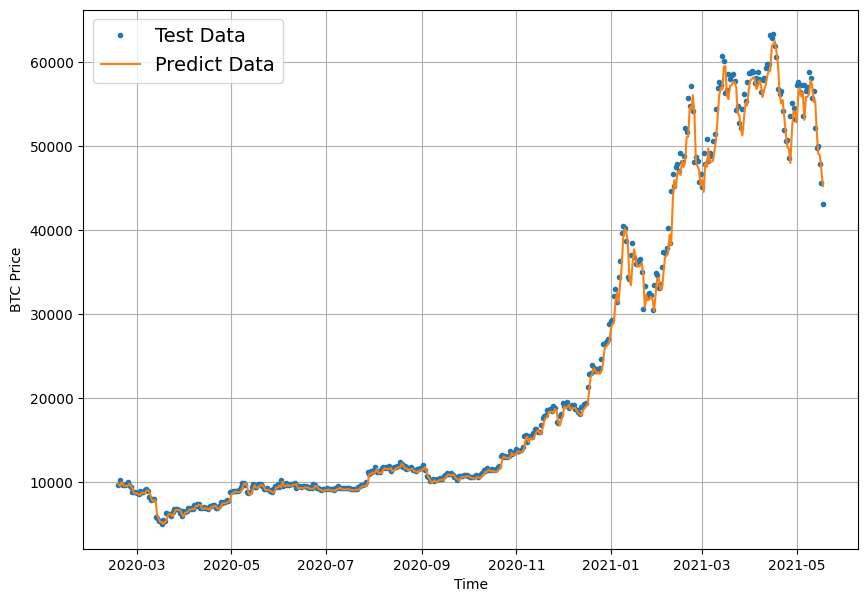

In [57]:
offset = 100
plt.figure(figsize = (10,7))
plot_time_series(timesteps = x_test[-len(test_windows):],values = test_labels[:,0],start = offset,label = "Test Data")
plot_time_series(timesteps = x_test[-len(test_windows):],values = model_1_preds,start = offset,label = "Predict Data",format = "-")

## Model 2: Dense(Window = 30,Horizon = 1)

In [58]:
full_windows,full_labels = make_windows(prices,window_size = 30,horizon = 1)

In [59]:
train_windows,test_windows,train_labels,test_labels = make_train_test_splits(full_windows,full_labels)

In [60]:
model_2 = tf.keras.Sequential([
    layers.Dense(128,activation = "relu"),
    layers.Dense(1,activation = "linear"),
],name = "model_2_dense")
model_2.compile(loss = "mae",metrics = ["mae"],optimizer = "adam")

In [61]:
history_2 = model_2.fit(
    train_windows,
    train_labels,
    epochs = 100,
    verbose = 1,
    batch_size = 128,
    validation_data = (test_windows,test_labels),
    callbacks = [create_model_checkpoint(model_name = model_2.name)]
)

Epoch 1/100
 1/18 [>.............................] - ETA: 14s - loss: 4505.0410 - mae: 4505.0410

18/18 [==============================] - 1s 36ms/step - loss: 1796.8430 - mae: 1796.8430 - val_loss: 1883.7408 - val_mae: 1883.7408
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 602.0822 - mae: 602.0822

18/18 [==============================] - 0s 29ms/step - loss: 502.2909 - mae: 502.2909 - val_loss: 1671.2656 - val_mae: 1671.2656
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 345.4106 - mae: 345.4106 - val_loss: 1754.2014 - val_mae: 1754.2014
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 233.0942 - mae: 233.0942

18/18 [==============================] - 1s 31ms/step - loss: 261.6530 - mae: 261.6530 - val_loss: 1246.0068 - val_mae: 1246.0068
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 220.4193 - mae: 220.4193

18/18 [==============================] - 1s 29ms/step - loss: 228.1227 - mae: 228.1227 - val_loss: 1129.1639 - val_mae: 1129.1639
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 213.3465 - mae: 213.3465 - val_loss: 1171.7057 - val_mae: 1171.7057
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 202.9676 - mae: 202.9676

18/18 [==============================] - 1s 30ms/step - loss: 198.7885 - mae: 198.7885 - val_loss: 1075.4476 - val_mae: 1075.4476
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 196.0136 - mae: 196.0136

18/18 [==============================] - 0s 29ms/step - loss: 196.2115 - mae: 196.2115 - val_loss: 1034.6425 - val_mae: 1034.6425
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 194.5684 - mae: 194.5684

18/18 [==============================] - 0s 28ms/step - loss: 186.3904 - mae: 186.3904 - val_loss: 1028.6136 - val_mae: 1028.6136
Epoch 10/100
18/18 [==============================] - 0s 5ms/step - loss: 192.3620 - mae: 192.3620 - val_loss: 1031.7417 - val_mae: 1031.7417
Epoch 11/100
18/18 [==============================] - 0s 6ms/step - loss: 184.4758 - mae: 184.4758 - val_loss: 1072.8702 - val_mae: 1072.8702
Epoch 12/100
 1/18 [>.............................] - ETA: 0s - loss: 149.6082 - mae: 149.6082

18/18 [==============================] - 0s 28ms/step - loss: 182.3347 - mae: 182.3347 - val_loss: 941.4755 - val_mae: 941.4755
Epoch 13/100
18/18 [==============================] - 0s 4ms/step - loss: 171.9867 - mae: 171.9867 - val_loss: 979.9599 - val_mae: 979.9599
Epoch 14/100
18/18 [==============================] - 0s 6ms/step - loss: 170.4804 - mae: 170.4804 - val_loss: 1038.4591 - val_mae: 1038.4591
Epoch 15/100
18/18 [==============================] - 0s 5ms/step - loss: 176.3735 - mae: 176.3735 - val_loss: 1078.3981 - val_mae: 1078.3981
Epoch 16/100
18/18 [==============================] - ETA: 0s - loss: 173.7954 - mae: 173.7954

18/18 [==============================] - 1s 31ms/step - loss: 173.7954 - mae: 173.7954 - val_loss: 903.9645 - val_mae: 903.9645
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 161.1275 - mae: 161.1275 - val_loss: 1362.8040 - val_mae: 1362.8040
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 260.1192 - mae: 260.1192

18/18 [==============================] - 1s 29ms/step - loss: 172.4534 - mae: 172.4534 - val_loss: 879.8544 - val_mae: 879.8544
Epoch 19/100
18/18 [==============================] - 0s 4ms/step - loss: 154.3323 - mae: 154.3323 - val_loss: 1226.1851 - val_mae: 1226.1851
Epoch 20/100
18/18 [==============================] - 0s 5ms/step - loss: 168.2954 - mae: 168.2954 - val_loss: 903.6777 - val_mae: 903.6777
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 181.4037 - mae: 181.4037

18/18 [==============================] - 1s 45ms/step - loss: 168.1943 - mae: 168.1943 - val_loss: 818.5342 - val_mae: 818.5342
Epoch 22/100
18/18 [==============================] - 0s 5ms/step - loss: 148.2641 - mae: 148.2641 - val_loss: 861.9309 - val_mae: 861.9309
Epoch 23/100
18/18 [==============================] - 0s 8ms/step - loss: 150.0854 - mae: 150.0854 - val_loss: 1085.6227 - val_mae: 1085.6227
Epoch 24/100
12/18 [===================>..........] - ETA: 0s - loss: 145.4315 - mae: 145.4315

18/18 [==============================] - 1s 44ms/step - loss: 149.2465 - mae: 149.2465 - val_loss: 794.0607 - val_mae: 794.0607
Epoch 25/100
18/18 [==============================] - 0s 7ms/step - loss: 141.6081 - mae: 141.6081 - val_loss: 832.0295 - val_mae: 832.0295
Epoch 26/100
13/18 [====================>.........] - ETA: 0s - loss: 141.4407 - mae: 141.4407

18/18 [==============================] - 1s 47ms/step - loss: 143.7657 - mae: 143.7657 - val_loss: 792.4308 - val_mae: 792.4308
Epoch 27/100
14/18 [======================>.......] - ETA: 0s - loss: 163.2929 - mae: 163.2929

18/18 [==============================] - 1s 37ms/step - loss: 156.8152 - mae: 156.8152 - val_loss: 786.5482 - val_mae: 786.5482
Epoch 28/100
18/18 [==============================] - 0s 5ms/step - loss: 142.7668 - mae: 142.7668 - val_loss: 789.6091 - val_mae: 789.6091
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 138.9344 - mae: 138.9344 - val_loss: 790.4319 - val_mae: 790.4319
Epoch 30/100
18/18 [==============================] - 0s 6ms/step - loss: 150.8727 - mae: 150.8727 - val_loss: 1236.6848 - val_mae: 1236.6848
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 149.7468 - mae: 149.7468 - val_loss: 923.8184 - val_mae: 923.8184
Epoch 32/100
18/18 [==============================] - 0s 5ms/step - loss: 153.7021 - mae: 153.7021 - val_loss: 861.9589 - val_mae: 861.9589
Epoch 33/100
18/18 [==============================] - 0s 6ms/step - loss: 141.9238 - mae: 141.9238 - val_loss: 849.6642 - val_mae: 849.6642
Epoch 34/100
 1/18 [>.........

18/18 [==============================] - 1s 31ms/step - loss: 151.1247 - mae: 151.1247 - val_loss: 742.3871 - val_mae: 742.3871
Epoch 35/100
18/18 [==============================] - 0s 5ms/step - loss: 135.5630 - mae: 135.5630 - val_loss: 891.3279 - val_mae: 891.3279
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 139.0818 - mae: 139.0818 - val_loss: 823.1028 - val_mae: 823.1028
Epoch 37/100
18/18 [==============================] - 0s 4ms/step - loss: 137.8401 - mae: 137.8401 - val_loss: 783.8401 - val_mae: 783.8402
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 152.1007 - mae: 152.1007

18/18 [==============================] - 1s 30ms/step - loss: 132.9313 - mae: 132.9313 - val_loss: 717.0013 - val_mae: 717.0013
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 129.2599 - mae: 129.2599 - val_loss: 724.1012 - val_mae: 724.1012
Epoch 40/100
18/18 [==============================] - 0s 5ms/step - loss: 136.6728 - mae: 136.6728 - val_loss: 742.8363 - val_mae: 742.8363
Epoch 41/100
 1/18 [>.............................] - ETA: 0s - loss: 108.4759 - mae: 108.4759

18/18 [==============================] - 1s 31ms/step - loss: 134.1782 - mae: 134.1782 - val_loss: 701.0557 - val_mae: 701.0557
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 131.5250 - mae: 131.5250 - val_loss: 730.6559 - val_mae: 730.6559
Epoch 43/100
18/18 [==============================] - 0s 4ms/step - loss: 131.9152 - mae: 131.9152 - val_loss: 990.3011 - val_mae: 990.3011
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 141.5721 - mae: 141.5721 - val_loss: 723.9531 - val_mae: 723.9531
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 134.6374 - mae: 134.6374 - val_loss: 752.6301 - val_mae: 752.6301
Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 126.7871 - mae: 126.7871 - val_loss: 717.7044 - val_mae: 717.7044
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 126.8582 - mae: 126.8582 - val_loss: 743.3890 - val_mae: 743.3890
Epoch 48/100
16/18 [============

18/18 [==============================] - 1s 29ms/step - loss: 127.5621 - mae: 127.5621 - val_loss: 684.5262 - val_mae: 684.5262
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 125.9191 - mae: 125.9191 - val_loss: 702.6265 - val_mae: 702.6265
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 152.1843 - mae: 152.1843 - val_loss: 743.1206 - val_mae: 743.1206
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 130.7044 - mae: 130.7044 - val_loss: 860.7761 - val_mae: 860.7761
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 134.1153 - mae: 134.1153 - val_loss: 735.5400 - val_mae: 735.5400
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 129.4748 - mae: 129.4748 - val_loss: 718.3549 - val_mae: 718.3549
Epoch 54/100
18/18 [==============================] - 0s 6ms/step - loss: 132.0870 - mae: 132.0870 - val_loss: 700.0551 - val_mae: 700.0551
Epoch 55/100
18/18 [============

18/18 [==============================] - 1s 30ms/step - loss: 143.1925 - mae: 143.1925 - val_loss: 670.0811 - val_mae: 670.0811
Epoch 57/100
 1/18 [>.............................] - ETA: 0s - loss: 108.5370 - mae: 108.5370

18/18 [==============================] - 1s 31ms/step - loss: 126.0085 - mae: 126.0085 - val_loss: 666.5974 - val_mae: 666.5974
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 124.2675 - mae: 124.2675 - val_loss: 877.2527 - val_mae: 877.2527
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 163.1232 - mae: 163.1232 - val_loss: 722.8602 - val_mae: 722.8602
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 135.9605 - mae: 135.9605 - val_loss: 815.7990 - val_mae: 815.7990
Epoch 61/100
18/18 [==============================] - 0s 5ms/step - loss: 128.9513 - mae: 128.9513 - val_loss: 668.6788 - val_mae: 668.6788
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 122.2727 - mae: 122.2727 - val_loss: 745.8046 - val_mae: 745.8046
Epoch 63/100
 1/18 [>.............................] - ETA: 0s - loss: 131.2452 - mae: 131.2452

18/18 [==============================] - 1s 29ms/step - loss: 127.3065 - mae: 127.3065 - val_loss: 653.3813 - val_mae: 653.3813
Epoch 64/100
 1/18 [>.............................] - ETA: 0s - loss: 92.0190 - mae: 92.0190

18/18 [==============================] - 1s 29ms/step - loss: 117.8965 - mae: 117.8965 - val_loss: 652.4429 - val_mae: 652.4429
Epoch 65/100
 1/18 [>.............................] - ETA: 0s - loss: 120.2294 - mae: 120.2294

18/18 [==============================] - 0s 29ms/step - loss: 120.4885 - mae: 120.4885 - val_loss: 644.0115 - val_mae: 644.0115
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 119.0567 - mae: 119.0567 - val_loss: 766.2017 - val_mae: 766.2017
Epoch 67/100
18/18 [==============================] - 0s 4ms/step - loss: 120.5718 - mae: 120.5718 - val_loss: 660.9482 - val_mae: 660.9482
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 124.8314 - mae: 124.8314 - val_loss: 700.1228 - val_mae: 700.1228
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 125.8900 - mae: 125.8900 - val_loss: 908.2639 - val_mae: 908.2639
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 134.4386 - mae: 134.4386 - val_loss: 857.0289 - val_mae: 857.0289
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 132.5518 - mae: 132.5518 - val_loss: 671.0280 - val_mae: 671.0280
Epoch 72/100
18/18 [============

18/18 [==============================] - 1s 32ms/step - loss: 128.2839 - mae: 128.2839 - val_loss: 639.8508 - val_mae: 639.8508
Epoch 76/100
18/18 [==============================] - 0s 5ms/step - loss: 134.1378 - mae: 134.1378 - val_loss: 669.4771 - val_mae: 669.4771
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 129.2510 - mae: 129.2510 - val_loss: 663.4649 - val_mae: 663.4649
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 160.9359 - mae: 160.9359 - val_loss: 1175.5350 - val_mae: 1175.5350
Epoch 79/100
18/18 [==============================] - 0s 4ms/step - loss: 147.1903 - mae: 147.1903 - val_loss: 823.1985 - val_mae: 823.1985
Epoch 80/100
18/18 [==============================] - 0s 5ms/step - loss: 126.5277 - mae: 126.5277 - val_loss: 694.7381 - val_mae: 694.7381
Epoch 81/100
18/18 [==============================] - 0s 5ms/step - loss: 132.4356 - mae: 132.4356 - val_loss: 992.8795 - val_mae: 992.8795
Epoch 82/100
18/18 [==========

18/18 [==============================] - 1s 40ms/step - loss: 118.9557 - mae: 118.9557 - val_loss: 638.8331 - val_mae: 638.8331
Epoch 84/100
18/18 [==============================] - 0s 7ms/step - loss: 123.7095 - mae: 123.7095 - val_loss: 709.3580 - val_mae: 709.3580
Epoch 85/100
13/18 [====================>.........] - ETA: 0s - loss: 118.0268 - mae: 118.0268

18/18 [==============================] - 1s 42ms/step - loss: 121.9390 - mae: 121.9390 - val_loss: 636.2683 - val_mae: 636.2683
Epoch 86/100
14/18 [======================>.......] - ETA: 0s - loss: 118.1149 - mae: 118.1149

18/18 [==============================] - 1s 56ms/step - loss: 117.4168 - mae: 117.4168 - val_loss: 631.4792 - val_mae: 631.4792
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 124.7209 - mae: 124.7209 - val_loss: 675.9859 - val_mae: 675.9859
Epoch 88/100
18/18 [==============================] - 0s 5ms/step - loss: 120.4552 - mae: 120.4552 - val_loss: 632.3575 - val_mae: 632.3575
Epoch 89/100
18/18 [==============================] - 0s 4ms/step - loss: 115.3252 - mae: 115.3252 - val_loss: 671.1729 - val_mae: 671.1729
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 116.5441 - mae: 116.5441 - val_loss: 655.5795 - val_mae: 655.5795
Epoch 91/100
18/18 [==============================] - 0s 6ms/step - loss: 116.6327 - mae: 116.6327 - val_loss: 664.3320 - val_mae: 664.3320
Epoch 92/100
18/18 [==============================] - 0s 4ms/step - loss: 113.9680 - mae: 113.9680 - val_loss: 745.3997 - val_mae: 745.3997
Epoch 93/100
18/18 [============

18/18 [==============================] - 1s 30ms/step - loss: 112.4242 - mae: 112.4242 - val_loss: 620.1436 - val_mae: 620.1436
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 119.4887 - mae: 119.4887 - val_loss: 620.2855 - val_mae: 620.2855


In [62]:
model_2_preds = make_preds(model_2,test_windows)

18/18 [==============================] - 0s 1ms/step


In [63]:
evaluation_metrics(y_true = tf.squeeze(test_labels),y_pred=model_2_preds)

{'mae': 620.2856,
 'mse': 1280682.9,
 'rmse': 1131.6726,
 'mape': 2.8423185,
 'mase': 1.0842654}

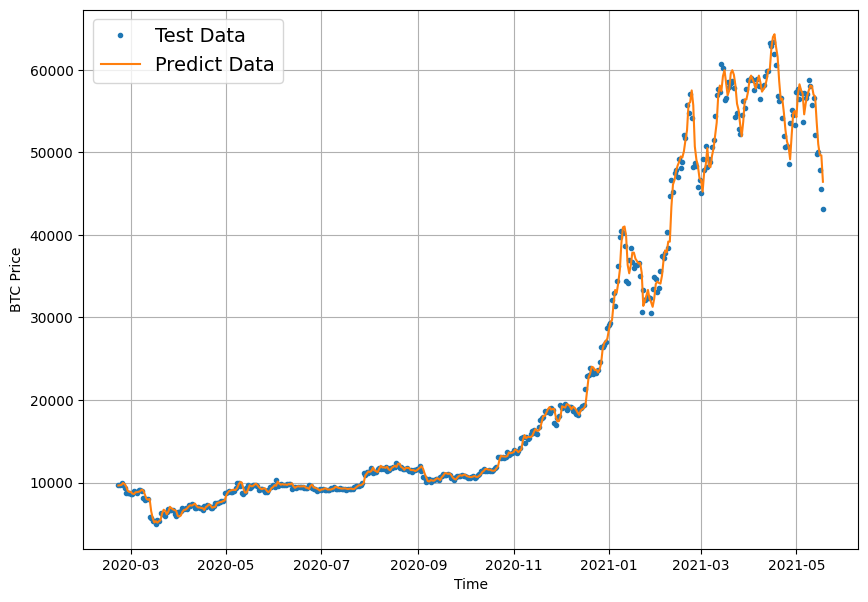

In [64]:
offset = 100
plt.figure(figsize = (10,7))
plot_time_series(timesteps = x_test[-len(test_windows):],values = test_labels[:,0],start = offset,label = "Test Data")
plot_time_series(timesteps = x_test[-len(test_windows):],values = model_2_preds,start = offset,label = "Predict Data",format = "-")

## Model 3: Dense(Windows = 30,Horizon = 7)

In [65]:
full_windows,full_labels = make_windows(prices,window_size = 30,horizon = 7)

In [66]:
train_windows,test_windows,train_labels,test_labels = make_train_test_splits(full_windows,full_labels)

In [67]:

tf.random.set_seed(42)

# Create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [68]:
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 608.9947


608.9946899414062

In [69]:
model_3_preds = model_3.predict(test_windows)

18/18 [==============================] - 0s 2ms/step


In [70]:
model_3_preds[:5]

array([[8818.031],
       [8645.931],
       [8542.07 ],
       [8433.685],
       [8479.278]], dtype=float32)

## Model 4: Conv1D

In [71]:
full_windows,full_labels = make_windows(prices,window_size = 7,horizon = 1)

In [72]:
len(full_windows),len(full_labels)

(2780, 2780)

In [73]:
train_windows,test_windows,train_labels,test_labels = make_train_test_splits(full_windows,full_labels)

In [74]:
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [75]:
model_4_results = model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 624.1985


In [76]:
model_4_results = evaluation_metrics(y_true = tf.squeeze(test_labels),y_pred = model_4_results)

In [77]:
model_4_results

{'mae': 19472.17,
 'mse': 686362050.0,
 'rmse': 26198.512,
 'mape': 94.764435,
 'mase': 34.20721}

## Model 5: RNN(LSTM)

In [78]:
WINDOW_SIZE = 7
HORIZON  = 1

In [79]:
tf.random.set_seed(42)

inputs = layers.Input(shape = (WINDOW_SIZE))
x = layers.Lambda(lambda x:tf.expand_dims(x,axis = 1))(inputs)
x = layers.LSTM(128,activation = "relu",return_sequences = True)(x)
x = layers.LSTM(128,activation = "relu")(x)
x = layers.Dense(32,activation = "relu")(x)
outputs = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs,outputs,name = "model_5_lstm")

In [80]:
model_5.compile(loss = "mae",optimizer = "adam")

In [81]:
model_5.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
18/18 [==============================] - 8s 209ms/step - loss: 2853.6829 - val_loss: 14973.6572
Epoch 2/100
18/18 [==============================] - 3s 203ms/step - loss: 1251.5250 - val_loss: 4010.1938
Epoch 3/100
18/18 [==============================] - 4s 220ms/step - loss: 335.9177 - val_loss: 1094.9938
Epoch 4/100
18/18 [==============================] - 4s 218ms/step - loss: 198.8849 - val_loss: 963.3923
Epoch 5/100
18/18 [==============================] - 9s 518ms/step - loss: 172.6580 - val_loss: 908.1164
Epoch 6/100
18/18 [==============================] - 6s 327ms/step - loss: 176.8234 - val_loss: 900.7960
Epoch 7/100
18/18 [==============================] - 3s 185ms/step - loss: 162.6255 - val_loss: 896.4853
Epoch 8/100
18/18 [==============================] - 0s 11ms/step - loss: 156.7694 - val_loss: 906.5718
Epoch 9/100
18/18 [==============================] - 0s 13ms/step - loss: 158.7335 - val_loss: 908.2936
Epoch 10/100
18/18 [==============================]

In [82]:
model_5_results = model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 589.4815


In [83]:
model_5_results = evaluation_metrics(y_true = tf.squeeze(test_labels),y_pred = model_5_results)

In [84]:
model_5_results

{'mae': 19506.887,
 'mse': 687715260.0,
 'rmse': 26224.326,
 'mape': 95.05565,
 'mase': 34.268196}

## Make a Multi-Variate time series Data

In [85]:
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


In [86]:
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012 
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [87]:
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days
     

(1012, 2414)

In [88]:
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

In [89]:
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [90]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[['Price','block_reward']]),index = bitcoin_prices_block.index,columns = bitcoin_prices_block.columns)

In [91]:
scaled_price_block_df

,Price,block_reward
Date,,
2013-10-01,0.000238,1.0
2013-10-02,0.000267,1.0
2013-10-03,0.000000,1.0
2013-10-04,0.000160,1.0
2013-10-05,0.000202,1.0
...,...,...
2021-05-14,0.785214,0.0
2021-05-15,0.789461,0.0
2021-05-16,0.755509,0.0


<Axes: xlabel='Date'>

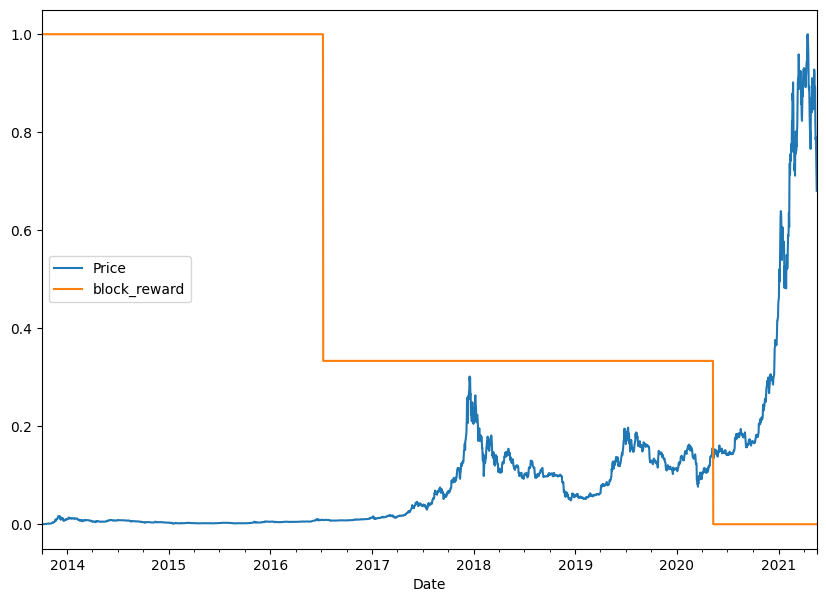

In [92]:
scaled_price_block_df.plot(figsize = (10,7))

In [93]:
bitcoin_prices_windowed = bitcoin_prices_block.copy()

In [94]:
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)  

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [95]:
x = bitcoin_prices_windowed.dropna().drop("Price",axis = 1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()['Price'].astype(np.float32)

In [96]:
split_size = int(len(x)*0.8)
x_train,y_train = x[:split_size],y[:split_size]
x_test,y_test = x[split_size:],y[split_size:]

In [97]:
model_6 = tf.keras.Sequential([
    layers.Dense(128,activation = "relu"),
    layers.Dense(128,activation = "relu"),
    layers.Dense(HORIZON,activation = "linear")
],name = "model_6_dense")

In [98]:
model_6.compile(loss = "mae",optimizer = "adam")

In [99]:
model_6.fit(x_train,
            y_train,
            batch_size=128, 
            epochs=100,
            verbose=0,
            validation_data=(x_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

In [100]:
model_6_results = model_6.evaluate(x_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 579.3052


In [101]:
model_6_preds = tf.squeeze(model_6.predict(x_test))

18/18 [==============================] - 0s 2ms/step


In [102]:
model_6_results = evaluation_metrics(y_true = y_test,y_pred = model_6_results)

In [103]:
model_6_results

{'mae': 19517.062,
 'mse': 688112450.0,
 'rmse': 26231.896,
 'mape': 95.141014,
 'mase': 34.28607}

## Model 7: N-Beats

In [104]:
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,input_size:int,theta_size:int,horizon:int,n_neurons:int,n_layers:int,**kwargs):
        super().__init__(**kwargs)
        self.input_size = input_size
        self.theta_size = theta_size
        self.horizon = horizon
        self.n_neurons = n_neurons
        self.n_layers = n_layers

        self.hidden = [tf.keras.layers.Dense(n_neurons,activation = "relu") for _ in range(n_layers)]
        self.theta_layer = tf.keras.layers.Dense(theta_size,activation = "linear",name = "theta")

  def call(self, inputs): # the call method is what runs when the layer is called 
    x = inputs 
    for layer in self.hidden: # pass inputs through each hidden layer 
      x = layer(x)
    theta = self.theta_layer(x) 
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [105]:

# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE, 
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast 
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)
     

In [106]:
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [107]:
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.18732798 -0.2803525  -0.6973903  -0.95275867  0.37512675 -0.42588693
  0.15830809]
Forecast: 0.3556789755821228


## Preparing data for N-Beats Algorithm

In [108]:
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [109]:
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [110]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)
test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

In [111]:
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))


In [112]:
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [113]:
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30
INPUT_SIZE = WINDOW_SIZE*HORIZON
THETA_SIZE = INPUT_SIZE+HORIZON

### Residual Connections

In [114]:
tensor_1 = tf.range(10)+10
tensor_2 = tf.range(10)

subtracted = layers.subtract([tensor_1,tensor_2])

added = layers.add([tensor_1,tensor_2])

### Modelling

In [115]:
tf.random.set_seed(42)
#Initial Block
nbeats_block_layer = NBeatsBlock(
    INPUT_SIZE,
    THETA_SIZE,
    HORIZON,
    N_NEURONS,
    N_LAYERS,name = "InitialBlock"
    )
#Input Stack
stack_input = layers.Input(shape = (INPUT_SIZE),name = "stack_input")
#Initial backcast and forecast
backcast,forecast = nbeats_block_layer(stack_input)
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00") 
#Stack of Blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals)
  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}") 
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")
# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, 
                         outputs=forecast, 
                         name="model_7_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])


Epoch 152: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 252: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.


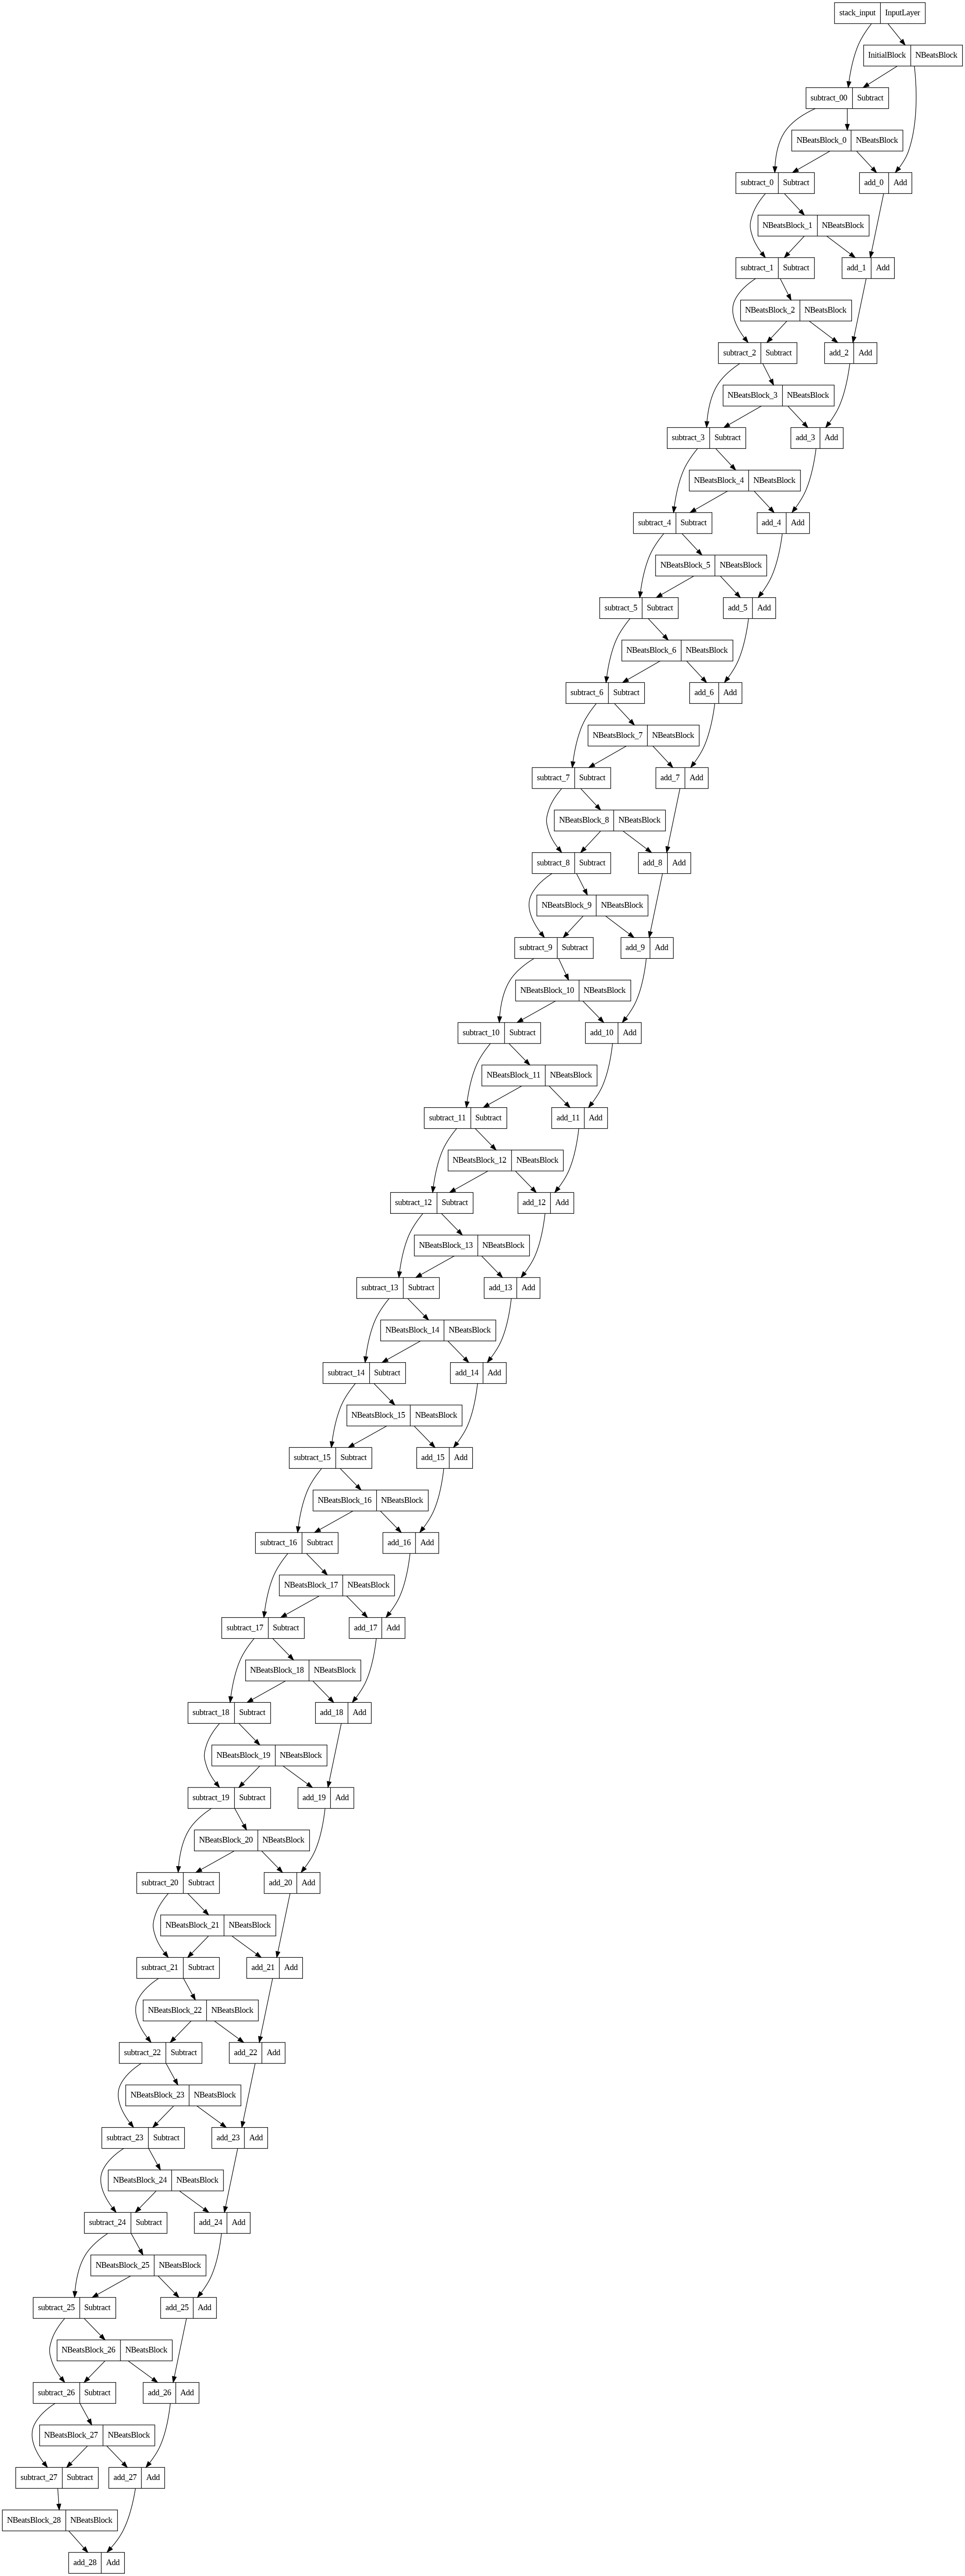

In [116]:
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Model 8: Ensemble Overview

In [ ]:
def get_ensemble_models(horizon=HORIZON, 
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10, 
                        num_epochs=100, 
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize layers with normal (Gaussian) distribution so we can use the models for prediction
        # interval estimation later: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"), 
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)                                 
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Add callbacks to prevent training from going/stalling for too long
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models # return list 

## Model 9: Future Prediction Model

In [119]:
HORIZON = 1
WINDOW_SIZE = 7

In [120]:
x_all = bitcoin_prices_windowed.dropna().drop(['Price','block_reward'],axis = 1).to_numpy()
y_all = bitcoin_prices_windowed.dropna()['Price'].to_numpy()

In [121]:
# 1. Turn X and y into tensor Datasets
features_dataset_all = tf.data.Dataset.from_tensor_slices(x_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2. Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all
     

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [123]:
tf.random.set_seed(42)
model_9 = tf.keras.Sequential([
    layers.Dense(128,activation = "relu"),
    layers.Dense(128,activation = "relu"),
    layers.Dense(HORIZON)
])
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0) # don't print out anything, we've seen this all before
     

### Predicting the Future

In [124]:
INTO_FUTURE = 14

In [125]:
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time 
  for _ in range(into_future):
    
    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")
    
    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  
  return future_forecast

In [126]:
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 58ms/step
Predicting on: 
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 56129.69921875

1/1 [==============================] - 0s 21ms/step
Predicting on: 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 56129.69921875] -> Prediction: 50798.79296875

1/1 [==============================] - 0s 21ms/step
Predicting on: 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 56129.69921875 50798.79296875] -> Prediction: 50321.39453125

1/1 [==============================] - 0s 31ms/step
Predicting on: 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 56129.69921875 50798.79296875 50321.39453125] -> Prediction: 49990.43359375

1/1 [==============================] - 0s 34ms/step
Predicting on: 
 [47885.62525472 45604.61575361 43144.47129086 56129.69921875
 50798.79296875 50321.39453125 49990.4

In [132]:
future_forecast

array([43144.473, 56129.7  , 50798.793, 50321.395, 49990.434, 45551.473,
       47020.074, 48582.598, 54615.37 , 50643.426, 50302.11 , 48533.63 ,
       45826.363, 49169.34 , 51090.223], dtype=float32)

In [127]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") 

In [128]:
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [129]:
next_time_steps = get_future_dates(start_date=last_timestep, 
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [130]:
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 56129.7  , 50798.793, 50321.395, 49990.434, 45551.473,
        47020.074, 48582.598, 54615.37 , 50643.426, 50302.11 , 48533.63 ,
        45826.363, 49169.34 , 51090.223], dtype=float32))

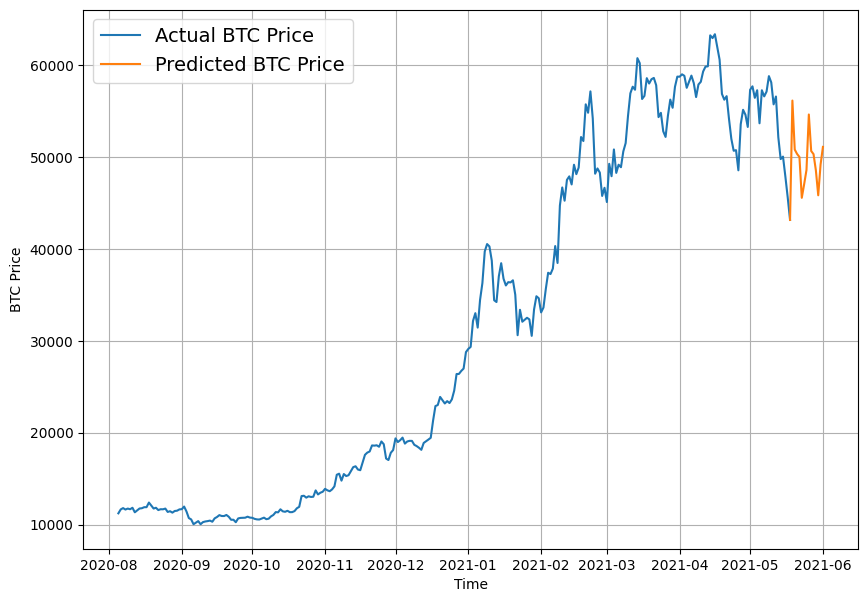

In [131]:
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

## Model 10: Turkey Data

In [133]:
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [134]:
btc_timesteps_turkey = np.array(bitcoin_prices.index)

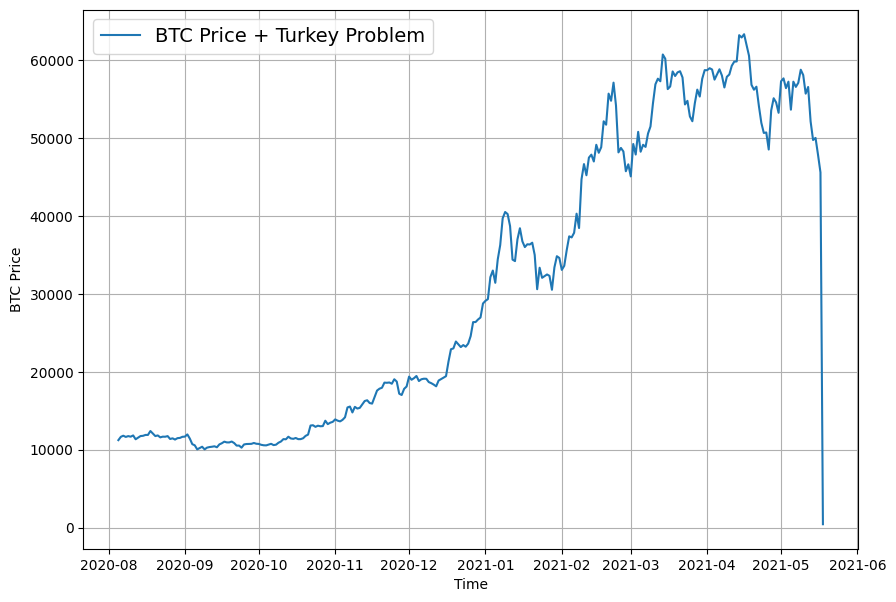

In [135]:

plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey, 
                 values=btc_price_turkey, 
                 format="-", 
                 label="BTC Price + Turkey Problem", 
                 start=2500)

In [136]:
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

In [137]:
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "Turkey_Model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])


In [138]:
turkey_model = tf.keras.models.load_model("model_experiments/Turkey_Model/")
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 4ms/step - loss: 637.0657


637.0657348632812

In [139]:
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

18/18 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8832.069 , 8777.89  , 9022.3545, 8777.997 , 8774.095 , 8726.135 ,
       8660.886 , 8528.421 , 8454.452 , 8517.451 ], dtype=float32)>

In [140]:
turkey_results = evaluation_metrics(y_pred = turkey_preds,y_true = y_test)

In [141]:
turkey_results

{'mae': 17129.53,
 'mse': 614405100.0,
 'rmse': 23713.46,
 'mape': 121.35884,
 'mase': 26.508}

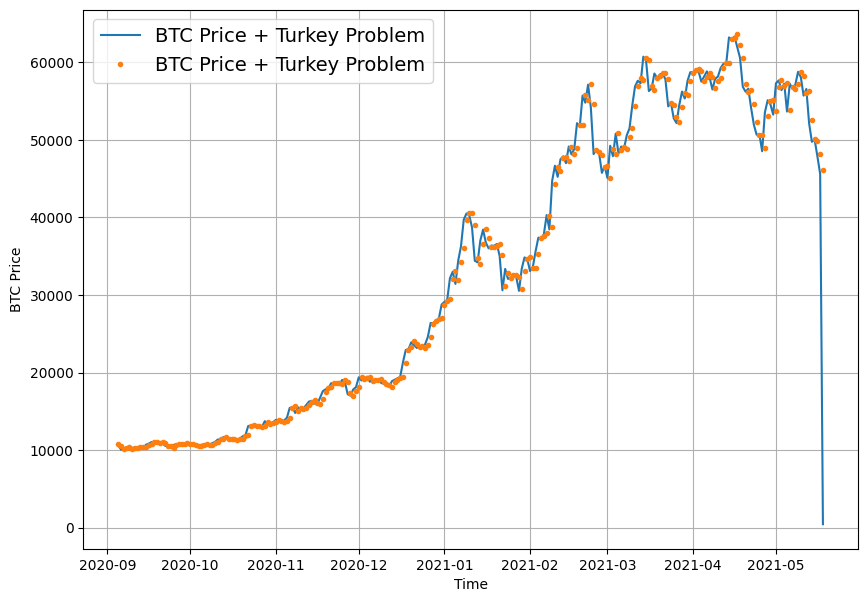

In [147]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):], 
                 values=btc_price_turkey[-len(y_test):], 
                 format="-", 
                 label="BTC Price + Turkey Problem", 
                 start=300)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):], 
                 values=turkey_preds, 
                 label="BTC Price + Turkey Problem", 
                 start=300)